In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from riskslim import RiskSLIMClassifier

### Alzheimer's EEG: Modeling

The features from the previous notebook are now passed into a sparse risk model.

In [ ]:
# Load features
df = pd.read_csv("alzheimers_features.csv")
df = df.loc[(df["label"] == "C") | (df["label"] == "A")]

# X and y
X = df.iloc[:, 1:].to_numpy()

y = np.zeros(len(X), dtype=int)
y[df["label"] == 'A'] = 1 # alzheimer's
y[df["label"] == 'C'] = 0 # controls

variable_names = list(df.columns[1:])

# Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Impute missing values
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imp.fit_transform(X)

# Drop offset, constant, and exponent parameters
#   for faster computation
keep = []

for i, v in enumerate(variable_names):
    if ("offset" not in v) and ("const" not in v) and ("exp" not in v):
        keep.append(i)
        
X_keep = X_imp[:, keep]
variable_names = np.array(variable_names)[keep].tolist()

In [6]:
# Initialize model
rs = RiskSLIMClassifier(
    max_size=5, # max model size (number of non-zero coefficients)
    max_coef=6, # value of largest/smallest coefficient.
    max_abs_offset=10,
    variable_names=variable_names,
    outcome_name="alzheimers",
    verbose=True,
    settings=settings
)

# Fit
rs.fit_cv(X_keep, y)

/Users/ryanhammonds/projects/risk-slim/riskslim/coefficient_set.py:238: UserWarning:

setting c0_value = 0.0 for (Intercept) to ensure that intercept is not penalized



06/09/23 @ 05:12 PM | cuts = 1 	 UB = 4.4231 	 LB = 0.0000 	 GAP = 100.0000%

06/09/23 @ 05:12 PM | cuts = 2 	 UB = 0.6932 	 LB = 0.0000 	 GAP = 100.0000%

06/09/23 @ 05:12 PM | cuts = 3 	 UB = 0.6932 	 LB = 0.0000 	 GAP = 99.9999%

06/09/23 @ 05:12 PM | cuts = 4 	 UB = 0.6932 	 LB = 0.0000 	 GAP = 99.9999%

06/09/23 @ 05:12 PM | cuts = 5 	 UB = 0.6932 	 LB = 0.0000 	 GAP = 99.9998%

06/09/23 @ 05:12 PM | cuts = 6 	 UB = 0.6932 	 LB = 0.0000 	 GAP = 99.9997%

06/09/23 @ 05:12 PM | cuts = 7 	 UB = 0.6932 	 LB = 0.0000 	 GAP = 99.9997%

06/09/23 @ 05:12 PM | cuts = 8 	 UB = 0.6932 	 LB = 0.0000 	 GAP = 99.9996%

06/09/23 @ 05:12 PM | cuts = 9 	 UB = 0.6932 	 LB = 0.0000 	 GAP = 99.9996%

06/09/23 @ 05:12 PM | cuts = 10 	 UB = 0.6235 	 LB = 0.0000 	 GAP = 99.9995%

06/09/23 @ 05:12 PM | cuts = 11 	 UB = 0.6235 	 LB = 0.0000 	 GAP = 99.9995%

06/09/23 @ 05:12 PM | cuts = 12 	 UB = 0.6235 	 LB = 0.0000 	 GAP = 99.9995%

06/09/23 @ 05:12 PM | cuts = 13 	 UB = 0.6235 	 LB = 0.0000 	 GAP = 99.

06/09/23 @ 05:12 PM | cuts = 107 	 UB = 0.2884 	 LB = 0.0000 	 GAP = 99.9985%

06/09/23 @ 05:12 PM | cuts = 108 	 UB = 0.2884 	 LB = 0.0000 	 GAP = 99.9985%

06/09/23 @ 05:12 PM | cuts = 109 	 UB = 0.2884 	 LB = 0.0000 	 GAP = 99.9985%

06/09/23 @ 05:12 PM | cuts = 110 	 UB = 0.2884 	 LB = 0.0000 	 GAP = 99.9985%

06/09/23 @ 05:12 PM | cuts = 111 	 UB = 0.2884 	 LB = 0.0000 	 GAP = 99.9985%

06/09/23 @ 05:12 PM | cuts = 112 	 UB = 0.2884 	 LB = 0.0000 	 GAP = 99.9985%

06/09/23 @ 05:12 PM | cuts = 113 	 UB = 0.2884 	 LB = 0.0000 	 GAP = 99.9985%

06/09/23 @ 05:12 PM | cuts = 114 	 UB = 0.2884 	 LB = 0.0000 	 GAP = 99.9985%

06/09/23 @ 05:12 PM | cuts = 115 	 UB = 0.2884 	 LB = 0.0000 	 GAP = 99.9985%

06/09/23 @ 05:12 PM | cuts = 116 	 UB = 0.2884 	 LB = 0.0000 	 GAP = 99.9985%

06/09/23 @ 05:12 PM | cuts = 117 	 UB = 0.2884 	 LB = 0.0000 	 GAP = 99.9985%

06/09/23 @ 05:12 PM | cuts = 118 	 UB = 0.2884 	 LB = 0.0000 	 GAP = 99.9985%

06/09/23 @ 05:12 PM | cuts = 119 	 UB = 0.2884 	 LB 

06/09/23 @ 05:12 PM | cuts = 211 	 UB = 0.1875 	 LB = 0.0000 	 GAP = 99.9977%

06/09/23 @ 05:12 PM | cuts = 212 	 UB = 0.1772 	 LB = 0.0000 	 GAP = 99.9976%

06/09/23 @ 05:12 PM | cuts = 213 	 UB = 0.1772 	 LB = 0.0000 	 GAP = 99.9976%

06/09/23 @ 05:12 PM | cuts = 214 	 UB = 0.1772 	 LB = 0.0000 	 GAP = 99.9976%

06/09/23 @ 05:12 PM | cuts = 215 	 UB = 0.1772 	 LB = 0.0000 	 GAP = 99.9976%

06/09/23 @ 05:12 PM | cuts = 216 	 UB = 0.1772 	 LB = 0.0000 	 GAP = 99.9976%

06/09/23 @ 05:12 PM | cuts = 217 	 UB = 0.1772 	 LB = 0.0000 	 GAP = 99.9976%

06/09/23 @ 05:12 PM | cuts = 218 	 UB = 0.1772 	 LB = 0.0000 	 GAP = 99.9976%

06/09/23 @ 05:12 PM | cuts = 219 	 UB = 0.1772 	 LB = 0.0000 	 GAP = 99.9976%

06/09/23 @ 05:12 PM | cuts = 220 	 UB = 0.1772 	 LB = 0.0000 	 GAP = 99.9976%

06/09/23 @ 05:12 PM | cuts = 221 	 UB = 0.1709 	 LB = 0.0000 	 GAP = 99.9975%

06/09/23 @ 05:12 PM | cuts = 222 	 UB = 0.1709 	 LB = 0.0000 	 GAP = 99.9975%

06/09/23 @ 05:12 PM | cuts = 223 	 UB = 0.1709 	 LB 

06/09/23 @ 05:12 PM | cuts = 315 	 UB = 0.1112 	 LB = 0.0594 	 GAP = 46.6129%

06/09/23 @ 05:12 PM | cuts = 316 	 UB = 0.1112 	 LB = 0.0601 	 GAP = 45.9699%

06/09/23 @ 05:12 PM | cuts = 317 	 UB = 0.1112 	 LB = 0.0612 	 GAP = 44.9684%

06/09/23 @ 05:12 PM | cuts = 318 	 UB = 0.1112 	 LB = 0.0613 	 GAP = 44.9034%

06/09/23 @ 05:12 PM | cuts = 319 	 UB = 0.1112 	 LB = 0.0614 	 GAP = 44.8185%

06/09/23 @ 05:12 PM | cuts = 320 	 UB = 0.1112 	 LB = 0.0615 	 GAP = 44.7113%

06/09/23 @ 05:12 PM | cuts = 321 	 UB = 0.1112 	 LB = 0.0620 	 GAP = 44.2715%

06/09/23 @ 05:12 PM | cuts = 322 	 UB = 0.1112 	 LB = 0.0623 	 GAP = 43.9925%

06/09/23 @ 05:12 PM | cuts = 323 	 UB = 0.1112 	 LB = 0.0627 	 GAP = 43.6293%

06/09/23 @ 05:12 PM | cuts = 324 	 UB = 0.1112 	 LB = 0.0635 	 GAP = 42.8767%

06/09/23 @ 05:12 PM | cuts = 325 	 UB = 0.1112 	 LB = 0.0637 	 GAP = 42.7235%

06/09/23 @ 05:12 PM | cuts = 326 	 UB = 0.1112 	 LB = 0.0640 	 GAP = 42.4761%

06/09/23 @ 05:12 PM | cuts = 327 	 UB = 0.1112 	 LB 


06/09/23 @ 05:12 PM | cuts = 419 	 UB = 0.1006 	 LB = 0.0847 	 GAP = 15.8349%

06/09/23 @ 05:12 PM | cuts = 420 	 UB = 0.1006 	 LB = 0.0848 	 GAP = 15.7079%

06/09/23 @ 05:12 PM | cuts = 421 	 UB = 0.1006 	 LB = 0.0849 	 GAP = 15.5697%

06/09/23 @ 05:12 PM | cuts = 422 	 UB = 0.1006 	 LB = 0.0852 	 GAP = 15.3420%

06/09/23 @ 05:12 PM | cuts = 423 	 UB = 0.1006 	 LB = 0.0853 	 GAP = 15.2556%

06/09/23 @ 05:12 PM | cuts = 424 	 UB = 0.1006 	 LB = 0.0853 	 GAP = 15.2069%

06/09/23 @ 05:12 PM | cuts = 425 	 UB = 0.1006 	 LB = 0.0854 	 GAP = 15.0946%

06/09/23 @ 05:12 PM | cuts = 426 	 UB = 0.1006 	 LB = 0.0854 	 GAP = 15.0812%

06/09/23 @ 05:12 PM | cuts = 427 	 UB = 0.1006 	 LB = 0.0855 	 GAP = 15.0346%

06/09/23 @ 05:12 PM | cuts = 428 	 UB = 0.1006 	 LB = 0.0858 	 GAP = 14.7570%

06/09/23 @ 05:12 PM | cuts = 429 	 UB = 0.1006 	 LB = 0.0859 	 GAP = 14.6322%

06/09/23 @ 05:12 PM | cuts = 430 	 UB = 0.1006 	 LB = 0.0859 	 GAP = 14.5755%

06/09/23 @ 05:12 PM | cuts = 431 	 UB = 0.1006 	 LB

06/09/23 @ 05:12 PM | cuts = 524 	 UB = 0.0970 	 LB = 0.0909 	 GAP = 6.2972%

06/09/23 @ 05:12 PM | cuts = 525 	 UB = 0.0970 	 LB = 0.0909 	 GAP = 6.2793%

06/09/23 @ 05:12 PM | cuts = 526 	 UB = 0.0970 	 LB = 0.0910 	 GAP = 6.2516%

06/09/23 @ 05:12 PM | cuts = 527 	 UB = 0.0970 	 LB = 0.0910 	 GAP = 6.2311%

06/09/23 @ 05:12 PM | cuts = 528 	 UB = 0.0970 	 LB = 0.0910 	 GAP = 6.2166%

06/09/23 @ 05:12 PM | cuts = 529 	 UB = 0.0970 	 LB = 0.0910 	 GAP = 6.1913%

06/09/23 @ 05:12 PM | cuts = 530 	 UB = 0.0970 	 LB = 0.0911 	 GAP = 6.1121%

06/09/23 @ 05:12 PM | cuts = 531 	 UB = 0.0970 	 LB = 0.0912 	 GAP = 6.0473%

06/09/23 @ 05:12 PM | cuts = 532 	 UB = 0.0970 	 LB = 0.0912 	 GAP = 6.0019%

06/09/23 @ 05:12 PM | cuts = 533 	 UB = 0.0970 	 LB = 0.0912 	 GAP = 5.9806%

06/09/23 @ 05:12 PM | cuts = 534 	 UB = 0.0970 	 LB = 0.0912 	 GAP = 5.9720%

06/09/23 @ 05:12 PM | cuts = 535 	 UB = 0.0970 	 LB = 0.0913 	 GAP = 5.9408%

06/09/23 @ 05:12 PM | cuts = 536 	 UB = 0.0970 	 LB = 0.0913 	 G

06/09/23 @ 05:12 PM | stopping CPA | coef gap is within tolerance (0.3147 < 0.9000)
06/09/23 @ 05:12 PM | warmstart CPA produced 628 cuts
06/09/23 @ 05:12 PM | running naive rounding on 15 solutions
06/09/23 @ 05:12 PM | best objective value: 0.623546
06/09/23 @ 05:12 PM | rounding produced 5 integer solutions
06/09/23 @ 05:12 PM | best objective value: 0.623546
06/09/23 @ 05:12 PM | running sequential rounding on 20 solutions
06/09/23 @ 05:12 PM | best objective value: 0.623546
06/09/23 @ 05:12 PM | sequential rounding produced 5 integer solutions
06/09/23 @ 05:12 PM | best objective value: 0.515498
06/09/23 @ 05:12 PM | polishing 25 solutions
06/09/23 @ 05:12 PM | best objective value: 0.5155
06/09/23 @ 05:12 PM | polishing produced 4 integer solutions
06/09/23 @ 05:12 PM | initialization produced 11 feasible solutions
06/09/23 @ 05:12 PM | best objective value: 0.456013
Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
CPXPARAM_

Lazy constraint(s) or lazy constraint/branch callback is present.
    Disabling dual reductions (CPX_PARAM_REDUCE) in presolve.
    Disabling presolve reductions that prevent crushing forms (CPX_PARAM_PREREFORM).
         Disabling repeat represolve because of lazy constraint/incumbent callback.
Tried aggregator 1 time.
Reduced MIP has 116 rows, 118 columns, and 345 nonzeros.
Reduced MIP has 57 binaries, 59 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.19 ticks)
Probing time = 0.00 sec. (0.06 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: traditional branch-and-cut.
Parallel mode: none, using 1 thread.
Root relaxation solution time = 0.00 sec. (0.18 ticks)
06/09/23 @ 05:12 PM | adding 628 initial cuts

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap         Variable B NodeID Parent  Depth

      0     0        0.0932    59                      0.000

  16830 11877        0.2467    18        0.4219        0.1273   233891   69.83%        alpha_13 D  16830  16829     35
  17158 12122        0.1688    23        0.4219        0.1274   237838   69.80%           rho_8 U  17158  17157     27
  17487 12335        0.1857    29        0.4219        0.1276   242399   69.77%        alpha_23 D  17487  17486     23
  17836 12581        0.2240    17        0.4219        0.1276   246891   69.75%          rho_21 U  17836  17835     32
  18189 12857        0.3753    10        0.4219        0.1278   250964   69.71%          rho_51 U  18189  18187     59
  18518 13082        0.2600    17        0.4219        0.1280   255362   69.67%          rho_42 U  18518  18517     27
  18852 13299        0.2949    16        0.4219        0.1281   259272   69.64%          rho_13 D  18852  18851     46
  19190 13528        0.2249    20        0.4219        0.1282   263599   69.61%        alpha_32 D  19190  19189     35
Elapsed time = 15.72 sec. (51456.00 ticks, tree 

Advanced basis not built.



User cuts applied:  1654

Root node processing (before b&c):
  Real time             =    0.22 sec. (544.16 ticks)
Sequential b&c:
  Real time             =   29.78 sec. (97895.80 ticks)
                          ------------
Total (root+branch&cut) =   30.00 sec. (98439.96 ticks)


/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 385, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/metrics/_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "/User

06/09/23 @ 05:12 PM | cuts = 1 	 UB = 4.4231 	 LB = 0.0000 	 GAP = 100.0000%

06/09/23 @ 05:12 PM | cuts = 2 	 UB = 0.6932 	 LB = 0.0000 	 GAP = 100.0000%

06/09/23 @ 05:12 PM | cuts = 3 	 UB = 0.6932 	 LB = 0.0000 	 GAP = 99.9999%

06/09/23 @ 05:12 PM | cuts = 4 	 UB = 0.6932 	 LB = 0.0000 	 GAP = 99.9999%

06/09/23 @ 05:12 PM | cuts = 5 	 UB = 0.6932 	 LB = 0.0000 	 GAP = 99.9998%

06/09/23 @ 05:12 PM | cuts = 6 	 UB = 0.6932 	 LB = 0.0000 	 GAP = 99.9998%

06/09/23 @ 05:12 PM | cuts = 7 	 UB = 0.6932 	 LB = 0.0000 	 GAP = 99.9998%

06/09/23 @ 05:12 PM | cuts = 8 	 UB = 0.6932 	 LB = 0.0000 	 GAP = 99.9998%

06/09/23 @ 05:12 PM | cuts = 9 	 UB = 0.6932 	 LB = 0.0000 	 GAP = 99.9998%

06/09/23 @ 05:12 PM | cuts = 10 	 UB = 0.6932 	 LB = 0.0000 	 GAP = 99.9997%

06/09/23 @ 05:12 PM | cuts = 11 	 UB = 0.6932 	 LB = 0.0000 	 GAP = 99.9997%

06/09/23 @ 05:12 PM | cuts = 12 	 UB = 0.6932 	 LB = 0.0000 	 GAP = 99.9998%

06/09/23 @ 05:12 PM | cuts = 13 	 UB = 0.6269 	 LB = 0.0000 	 GAP = 99.

06/09/23 @ 05:12 PM | cuts = 107 	 UB = 0.1908 	 LB = 0.0000 	 GAP = 99.9977%

06/09/23 @ 05:12 PM | cuts = 108 	 UB = 0.1908 	 LB = 0.0000 	 GAP = 99.9977%

06/09/23 @ 05:12 PM | cuts = 109 	 UB = 0.1908 	 LB = 0.0000 	 GAP = 99.9977%

06/09/23 @ 05:12 PM | cuts = 110 	 UB = 0.1908 	 LB = 0.0000 	 GAP = 99.9977%

06/09/23 @ 05:12 PM | cuts = 111 	 UB = 0.1908 	 LB = 0.0000 	 GAP = 99.9977%

06/09/23 @ 05:12 PM | cuts = 112 	 UB = 0.1908 	 LB = 0.0000 	 GAP = 99.9977%

06/09/23 @ 05:12 PM | cuts = 113 	 UB = 0.1908 	 LB = 0.0000 	 GAP = 99.9977%

06/09/23 @ 05:12 PM | cuts = 114 	 UB = 0.1908 	 LB = 0.0000 	 GAP = 99.9977%

06/09/23 @ 05:12 PM | cuts = 115 	 UB = 0.1908 	 LB = 0.0000 	 GAP = 99.9977%

06/09/23 @ 05:12 PM | cuts = 116 	 UB = 0.1908 	 LB = 0.0000 	 GAP = 99.9977%

06/09/23 @ 05:12 PM | cuts = 117 	 UB = 0.1908 	 LB = 0.0000 	 GAP = 99.9977%

06/09/23 @ 05:12 PM | cuts = 118 	 UB = 0.1908 	 LB = 0.0000 	 GAP = 99.9977%

06/09/23 @ 05:12 PM | cuts = 119 	 UB = 0.1908 	 LB 

06/09/23 @ 05:12 PM | cuts = 211 	 UB = 0.1703 	 LB = 0.0000 	 GAP = 99.9974%

06/09/23 @ 05:12 PM | cuts = 212 	 UB = 0.1703 	 LB = 0.0000 	 GAP = 99.9974%

06/09/23 @ 05:12 PM | cuts = 213 	 UB = 0.1703 	 LB = 0.0000 	 GAP = 99.9974%

06/09/23 @ 05:12 PM | cuts = 214 	 UB = 0.1703 	 LB = 0.0000 	 GAP = 99.9974%

06/09/23 @ 05:12 PM | cuts = 215 	 UB = 0.1703 	 LB = 0.0000 	 GAP = 99.9974%

06/09/23 @ 05:12 PM | cuts = 216 	 UB = 0.1703 	 LB = 0.0000 	 GAP = 99.9974%

06/09/23 @ 05:12 PM | cuts = 217 	 UB = 0.1703 	 LB = 0.0000 	 GAP = 99.9974%

06/09/23 @ 05:12 PM | cuts = 218 	 UB = 0.1703 	 LB = 0.0000 	 GAP = 99.9974%

06/09/23 @ 05:12 PM | cuts = 219 	 UB = 0.1703 	 LB = 0.0000 	 GAP = 99.9974%

06/09/23 @ 05:12 PM | cuts = 220 	 UB = 0.1703 	 LB = 0.0000 	 GAP = 99.9974%

06/09/23 @ 05:12 PM | cuts = 221 	 UB = 0.1703 	 LB = 0.0000 	 GAP = 99.9974%

06/09/23 @ 05:12 PM | cuts = 222 	 UB = 0.1703 	 LB = 0.0000 	 GAP = 99.9974%

06/09/23 @ 05:12 PM | cuts = 223 	 UB = 0.1703 	 LB 

06/09/23 @ 05:12 PM | cuts = 315 	 UB = 0.1209 	 LB = 0.0434 	 GAP = 64.1054%

06/09/23 @ 05:12 PM | cuts = 316 	 UB = 0.1209 	 LB = 0.0438 	 GAP = 63.7407%

06/09/23 @ 05:12 PM | cuts = 317 	 UB = 0.1209 	 LB = 0.0444 	 GAP = 63.3107%

06/09/23 @ 05:12 PM | cuts = 318 	 UB = 0.1209 	 LB = 0.0450 	 GAP = 62.7714%

06/09/23 @ 05:12 PM | cuts = 319 	 UB = 0.1169 	 LB = 0.0456 	 GAP = 60.9753%

06/09/23 @ 05:12 PM | cuts = 320 	 UB = 0.1169 	 LB = 0.0463 	 GAP = 60.3594%

06/09/23 @ 05:12 PM | cuts = 321 	 UB = 0.1149 	 LB = 0.0467 	 GAP = 59.3399%

06/09/23 @ 05:12 PM | cuts = 322 	 UB = 0.1149 	 LB = 0.0472 	 GAP = 58.9079%

06/09/23 @ 05:12 PM | cuts = 323 	 UB = 0.1101 	 LB = 0.0477 	 GAP = 56.7165%

06/09/23 @ 05:12 PM | cuts = 324 	 UB = 0.1101 	 LB = 0.0490 	 GAP = 55.4853%

06/09/23 @ 05:12 PM | cuts = 325 	 UB = 0.1101 	 LB = 0.0494 	 GAP = 55.1268%

06/09/23 @ 05:12 PM | cuts = 326 	 UB = 0.1101 	 LB = 0.0497 	 GAP = 54.8452%

06/09/23 @ 05:12 PM | cuts = 327 	 UB = 0.1101 	 LB 

06/09/23 @ 05:12 PM | cuts = 419 	 UB = 0.0988 	 LB = 0.0739 	 GAP = 25.1761%

06/09/23 @ 05:12 PM | cuts = 420 	 UB = 0.0982 	 LB = 0.0740 	 GAP = 24.7300%

06/09/23 @ 05:12 PM | cuts = 421 	 UB = 0.0982 	 LB = 0.0740 	 GAP = 24.6308%

06/09/23 @ 05:12 PM | cuts = 422 	 UB = 0.0982 	 LB = 0.0742 	 GAP = 24.4819%

06/09/23 @ 05:12 PM | cuts = 423 	 UB = 0.0973 	 LB = 0.0743 	 GAP = 23.6899%

06/09/23 @ 05:12 PM | cuts = 424 	 UB = 0.0973 	 LB = 0.0745 	 GAP = 23.4191%

06/09/23 @ 05:12 PM | cuts = 425 	 UB = 0.0973 	 LB = 0.0746 	 GAP = 23.3297%

06/09/23 @ 05:12 PM | cuts = 426 	 UB = 0.0973 	 LB = 0.0750 	 GAP = 22.9093%

06/09/23 @ 05:12 PM | cuts = 427 	 UB = 0.0972 	 LB = 0.0753 	 GAP = 22.5535%

06/09/23 @ 05:12 PM | cuts = 428 	 UB = 0.0972 	 LB = 0.0756 	 GAP = 22.2413%

06/09/23 @ 05:12 PM | cuts = 429 	 UB = 0.0972 	 LB = 0.0759 	 GAP = 21.8879%

06/09/23 @ 05:12 PM | cuts = 430 	 UB = 0.0972 	 LB = 0.0761 	 GAP = 21.7225%

06/09/23 @ 05:12 PM | cuts = 431 	 UB = 0.0972 	 LB 

06/09/23 @ 05:12 PM | cuts = 523 	 UB = 0.0914 	 LB = 0.0835 	 GAP = 8.7045%

06/09/23 @ 05:12 PM | cuts = 524 	 UB = 0.0914 	 LB = 0.0835 	 GAP = 8.6222%

06/09/23 @ 05:12 PM | cuts = 525 	 UB = 0.0914 	 LB = 0.0836 	 GAP = 8.4901%

06/09/23 @ 05:12 PM | cuts = 526 	 UB = 0.0914 	 LB = 0.0837 	 GAP = 8.4288%

06/09/23 @ 05:12 PM | cuts = 527 	 UB = 0.0914 	 LB = 0.0837 	 GAP = 8.3934%

06/09/23 @ 05:12 PM | cuts = 528 	 UB = 0.0914 	 LB = 0.0838 	 GAP = 8.3375%

06/09/23 @ 05:12 PM | cuts = 529 	 UB = 0.0914 	 LB = 0.0839 	 GAP = 8.2507%

06/09/23 @ 05:12 PM | cuts = 530 	 UB = 0.0914 	 LB = 0.0839 	 GAP = 8.2241%

06/09/23 @ 05:12 PM | cuts = 531 	 UB = 0.0914 	 LB = 0.0839 	 GAP = 8.2030%

06/09/23 @ 05:12 PM | cuts = 532 	 UB = 0.0914 	 LB = 0.0840 	 GAP = 8.1469%

06/09/23 @ 05:12 PM | cuts = 533 	 UB = 0.0914 	 LB = 0.0840 	 GAP = 8.0973%

06/09/23 @ 05:12 PM | cuts = 534 	 UB = 0.0911 	 LB = 0.0841 	 GAP = 7.7137%

06/09/23 @ 05:12 PM | cuts = 535 	 UB = 0.0911 	 LB = 0.0841 	 G

06/09/23 @ 05:12 PM | cuts = 629 	 UB = 0.0894 	 LB = 0.0864 	 GAP = 3.2532%

06/09/23 @ 05:12 PM | cuts = 630 	 UB = 0.0894 	 LB = 0.0865 	 GAP = 3.2015%

06/09/23 @ 05:12 PM | cuts = 631 	 UB = 0.0894 	 LB = 0.0865 	 GAP = 3.1897%

06/09/23 @ 05:12 PM | cuts = 632 	 UB = 0.0894 	 LB = 0.0865 	 GAP = 3.1741%

06/09/23 @ 05:12 PM | cuts = 633 	 UB = 0.0894 	 LB = 0.0865 	 GAP = 3.1688%

06/09/23 @ 05:12 PM | cuts = 634 	 UB = 0.0894 	 LB = 0.0865 	 GAP = 3.1672%

06/09/23 @ 05:12 PM | cuts = 635 	 UB = 0.0894 	 LB = 0.0865 	 GAP = 3.1644%

06/09/23 @ 05:12 PM | cuts = 636 	 UB = 0.0894 	 LB = 0.0865 	 GAP = 3.1587%

06/09/23 @ 05:12 PM | cuts = 637 	 UB = 0.0894 	 LB = 0.0865 	 GAP = 3.1571%

06/09/23 @ 05:12 PM | cuts = 638 	 UB = 0.0891 	 LB = 0.0866 	 GAP = 2.9122%

06/09/23 @ 05:12 PM | cuts = 639 	 UB = 0.0891 	 LB = 0.0866 	 GAP = 2.8854%

06/09/23 @ 05:12 PM | cuts = 640 	 UB = 0.0891 	 LB = 0.0866 	 GAP = 2.8553%

06/09/23 @ 05:12 PM | cuts = 641 	 UB = 0.0891 	 LB = 0.0866 	 G

Lazy constraint(s) or lazy constraint/branch callback is present.
    Disabling dual reductions (CPX_PARAM_REDUCE) in presolve.
    Disabling presolve reductions that prevent crushing forms (CPX_PARAM_PREREFORM).
         Disabling repeat represolve because of lazy constraint/incumbent callback.
Tried aggregator 1 time.
Reduced MIP has 116 rows, 118 columns, and 345 nonzeros.
Reduced MIP has 57 binaries, 59 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.19 ticks)
Probing time = 0.00 sec. (0.06 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: traditional branch-and-cut.
Parallel mode: none, using 1 thread.
Root relaxation solution time = 0.00 sec. (0.18 ticks)
06/09/23 @ 05:12 PM | adding 650 initial cuts

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap         Variable B NodeID Parent  Depth

      0     0        0.0867    63                      0.000

  16567 11689        0.2646    11        0.4687        0.1146   197619   75.55%        alpha_34 D  16567  16566     51
  16897 11901        0.2325    11        0.4687        0.1147   201284   75.53%        alpha_33 D  16897  16896     54
  17208 12124        0.2043    21        0.4687        0.1148   205517   75.50%           rho_0 U  17208  17206     46
  17557 12331        0.3648    12        0.4687        0.1149   208982   75.48%        alpha_42 D  17557  17556     46
  17890 12579        0.3220    12        0.4687        0.1150   212971   75.47%           rho_0 U  17890  17888     52
  18222 12831        0.2785     7        0.4687        0.1151   216428   75.45%          rho_14 N  18222  18220     26
  18528 13030        0.2824    13        0.4687        0.1152   219855   75.43%          rho_46 N  18528  18526     30
  18883 13247        0.3078    12        0.4687        0.1152   222687   75.42%          rho_36 N  18883  18882     32
  19200 13461        0.1731    18        0.4687 

Advanced basis not built.



User cuts applied:  2171

Root node processing (before b&c):
  Real time             =    0.28 sec. (670.83 ticks)
Sequential b&c:
  Real time             =   29.73 sec. (99186.00 ticks)
                          ------------
Total (root+branch&cut) =   30.00 sec. (99856.83 ticks)


/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 385, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/metrics/_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "/User

06/09/23 @ 05:13 PM | cuts = 1 	 UB = 5.0000 	 LB = 0.0000 	 GAP = 100.0000%

06/09/23 @ 05:13 PM | cuts = 2 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 100.0000%

06/09/23 @ 05:13 PM | cuts = 3 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 99.9999%

06/09/23 @ 05:13 PM | cuts = 4 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 99.9999%

06/09/23 @ 05:13 PM | cuts = 5 	 UB = 0.5956 	 LB = 0.0000 	 GAP = 99.9999%

06/09/23 @ 05:13 PM | cuts = 6 	 UB = 0.5956 	 LB = 0.0000 	 GAP = 99.9998%

06/09/23 @ 05:13 PM | cuts = 7 	 UB = 0.5956 	 LB = 0.0000 	 GAP = 99.9998%

06/09/23 @ 05:13 PM | cuts = 8 	 UB = 0.5956 	 LB = 0.0000 	 GAP = 99.9998%

06/09/23 @ 05:13 PM | cuts = 9 	 UB = 0.5956 	 LB = 0.0000 	 GAP = 99.9997%

06/09/23 @ 05:13 PM | cuts = 10 	 UB = 0.5956 	 LB = 0.0000 	 GAP = 99.9996%

06/09/23 @ 05:13 PM | cuts = 11 	 UB = 0.5956 	 LB = 0.0000 	 GAP = 99.9995%

06/09/23 @ 05:13 PM | cuts = 12 	 UB = 0.4609 	 LB = 0.0000 	 GAP = 99.9995%

06/09/23 @ 05:13 PM | cuts = 13 	 UB = 0.4609 	 LB = 0.0000 	 GAP = 99.

06/09/23 @ 05:13 PM | cuts = 107 	 UB = 0.1767 	 LB = 0.0000 	 GAP = 99.9972%

06/09/23 @ 05:13 PM | cuts = 108 	 UB = 0.1767 	 LB = 0.0000 	 GAP = 99.9972%

06/09/23 @ 05:13 PM | cuts = 109 	 UB = 0.1767 	 LB = 0.0000 	 GAP = 99.9972%

06/09/23 @ 05:13 PM | cuts = 110 	 UB = 0.1767 	 LB = 0.0000 	 GAP = 99.9972%

06/09/23 @ 05:13 PM | cuts = 111 	 UB = 0.1767 	 LB = 0.0000 	 GAP = 99.9972%

06/09/23 @ 05:13 PM | cuts = 112 	 UB = 0.1767 	 LB = 0.0000 	 GAP = 99.9972%

06/09/23 @ 05:13 PM | cuts = 113 	 UB = 0.1767 	 LB = 0.0000 	 GAP = 99.9972%

06/09/23 @ 05:13 PM | cuts = 114 	 UB = 0.1767 	 LB = 0.0000 	 GAP = 99.9972%

06/09/23 @ 05:13 PM | cuts = 115 	 UB = 0.1767 	 LB = 0.0000 	 GAP = 99.9972%

06/09/23 @ 05:13 PM | cuts = 116 	 UB = 0.1767 	 LB = 0.0000 	 GAP = 99.9972%

06/09/23 @ 05:13 PM | cuts = 117 	 UB = 0.1767 	 LB = 0.0000 	 GAP = 99.9972%

06/09/23 @ 05:13 PM | cuts = 118 	 UB = 0.1767 	 LB = 0.0000 	 GAP = 99.9972%

06/09/23 @ 05:13 PM | cuts = 119 	 UB = 0.1767 	 LB 

06/09/23 @ 05:13 PM | cuts = 211 	 UB = 0.1491 	 LB = 0.0000 	 GAP = 99.9966%

06/09/23 @ 05:13 PM | cuts = 212 	 UB = 0.1491 	 LB = 0.0000 	 GAP = 99.9966%

06/09/23 @ 05:13 PM | cuts = 213 	 UB = 0.1491 	 LB = 0.0000 	 GAP = 99.9966%

06/09/23 @ 05:13 PM | cuts = 214 	 UB = 0.1491 	 LB = 0.0000 	 GAP = 99.9966%

06/09/23 @ 05:13 PM | cuts = 215 	 UB = 0.1491 	 LB = 0.0000 	 GAP = 99.9966%

06/09/23 @ 05:13 PM | cuts = 216 	 UB = 0.1491 	 LB = 0.0000 	 GAP = 99.9966%

06/09/23 @ 05:13 PM | cuts = 217 	 UB = 0.1491 	 LB = 0.0000 	 GAP = 99.9966%

06/09/23 @ 05:13 PM | cuts = 218 	 UB = 0.1491 	 LB = 0.0000 	 GAP = 99.9966%

06/09/23 @ 05:13 PM | cuts = 219 	 UB = 0.1491 	 LB = 0.0000 	 GAP = 99.9966%

06/09/23 @ 05:13 PM | cuts = 220 	 UB = 0.1491 	 LB = 0.0000 	 GAP = 99.9966%

06/09/23 @ 05:13 PM | cuts = 221 	 UB = 0.1491 	 LB = 0.0000 	 GAP = 99.9966%

06/09/23 @ 05:13 PM | cuts = 222 	 UB = 0.1491 	 LB = 0.0000 	 GAP = 99.9966%

06/09/23 @ 05:13 PM | cuts = 223 	 UB = 0.1491 	 LB 

06/09/23 @ 05:13 PM | cuts = 315 	 UB = 0.1114 	 LB = 0.0311 	 GAP = 72.0474%

06/09/23 @ 05:13 PM | cuts = 316 	 UB = 0.1114 	 LB = 0.0317 	 GAP = 71.5553%

06/09/23 @ 05:13 PM | cuts = 317 	 UB = 0.1114 	 LB = 0.0319 	 GAP = 71.3699%

06/09/23 @ 05:13 PM | cuts = 318 	 UB = 0.1114 	 LB = 0.0325 	 GAP = 70.8579%

06/09/23 @ 05:13 PM | cuts = 319 	 UB = 0.1114 	 LB = 0.0328 	 GAP = 70.5210%

06/09/23 @ 05:13 PM | cuts = 320 	 UB = 0.1114 	 LB = 0.0329 	 GAP = 70.4408%

06/09/23 @ 05:13 PM | cuts = 321 	 UB = 0.1000 	 LB = 0.0331 	 GAP = 66.9352%

06/09/23 @ 05:13 PM | cuts = 322 	 UB = 0.1000 	 LB = 0.0338 	 GAP = 66.1785%

06/09/23 @ 05:13 PM | cuts = 323 	 UB = 0.1000 	 LB = 0.0339 	 GAP = 66.1019%

06/09/23 @ 05:13 PM | cuts = 324 	 UB = 0.1000 	 LB = 0.0342 	 GAP = 65.7864%

06/09/23 @ 05:13 PM | cuts = 325 	 UB = 0.1000 	 LB = 0.0356 	 GAP = 64.4359%

06/09/23 @ 05:13 PM | cuts = 326 	 UB = 0.1000 	 LB = 0.0366 	 GAP = 63.4331%

06/09/23 @ 05:13 PM | cuts = 327 	 UB = 0.1000 	 LB 

06/09/23 @ 05:13 PM | cuts = 419 	 UB = 0.0892 	 LB = 0.0667 	 GAP = 25.2400%

06/09/23 @ 05:13 PM | cuts = 420 	 UB = 0.0892 	 LB = 0.0668 	 GAP = 25.1252%

06/09/23 @ 05:13 PM | cuts = 421 	 UB = 0.0892 	 LB = 0.0669 	 GAP = 25.0483%

06/09/23 @ 05:13 PM | cuts = 422 	 UB = 0.0892 	 LB = 0.0670 	 GAP = 24.9344%

06/09/23 @ 05:13 PM | cuts = 423 	 UB = 0.0892 	 LB = 0.0670 	 GAP = 24.9031%

06/09/23 @ 05:13 PM | cuts = 424 	 UB = 0.0892 	 LB = 0.0671 	 GAP = 24.8456%

06/09/23 @ 05:13 PM | cuts = 425 	 UB = 0.0892 	 LB = 0.0672 	 GAP = 24.7073%

06/09/23 @ 05:13 PM | cuts = 426 	 UB = 0.0892 	 LB = 0.0673 	 GAP = 24.5415%

06/09/23 @ 05:13 PM | cuts = 427 	 UB = 0.0892 	 LB = 0.0675 	 GAP = 24.4009%

06/09/23 @ 05:13 PM | cuts = 428 	 UB = 0.0886 	 LB = 0.0675 	 GAP = 23.7542%

06/09/23 @ 05:13 PM | cuts = 429 	 UB = 0.0883 	 LB = 0.0677 	 GAP = 23.4122%

06/09/23 @ 05:13 PM | cuts = 430 	 UB = 0.0883 	 LB = 0.0679 	 GAP = 23.1326%

06/09/23 @ 05:13 PM | cuts = 431 	 UB = 0.0881 	 LB 

06/09/23 @ 05:13 PM | cuts = 523 	 UB = 0.0824 	 LB = 0.0759 	 GAP = 7.9351%

06/09/23 @ 05:13 PM | cuts = 524 	 UB = 0.0824 	 LB = 0.0759 	 GAP = 7.8599%

06/09/23 @ 05:13 PM | cuts = 525 	 UB = 0.0824 	 LB = 0.0760 	 GAP = 7.8067%

06/09/23 @ 05:13 PM | cuts = 526 	 UB = 0.0824 	 LB = 0.0760 	 GAP = 7.7421%

06/09/23 @ 05:13 PM | cuts = 527 	 UB = 0.0824 	 LB = 0.0760 	 GAP = 7.7296%

06/09/23 @ 05:13 PM | cuts = 528 	 UB = 0.0824 	 LB = 0.0761 	 GAP = 7.6958%

06/09/23 @ 05:13 PM | cuts = 529 	 UB = 0.0824 	 LB = 0.0761 	 GAP = 7.6557%

06/09/23 @ 05:13 PM | cuts = 530 	 UB = 0.0824 	 LB = 0.0761 	 GAP = 7.6096%

06/09/23 @ 05:13 PM | cuts = 531 	 UB = 0.0824 	 LB = 0.0761 	 GAP = 7.5982%

06/09/23 @ 05:13 PM | cuts = 532 	 UB = 0.0824 	 LB = 0.0762 	 GAP = 7.5476%

06/09/23 @ 05:13 PM | cuts = 533 	 UB = 0.0824 	 LB = 0.0762 	 GAP = 7.5318%

06/09/23 @ 05:13 PM | cuts = 534 	 UB = 0.0824 	 LB = 0.0762 	 GAP = 7.4968%

06/09/23 @ 05:13 PM | cuts = 535 	 UB = 0.0824 	 LB = 0.0762 	 G

Lazy constraint(s) or lazy constraint/branch callback is present.
    Disabling dual reductions (CPX_PARAM_REDUCE) in presolve.
    Disabling presolve reductions that prevent crushing forms (CPX_PARAM_PREREFORM).
         Disabling repeat represolve because of lazy constraint/incumbent callback.
Tried aggregator 1 time.
Reduced MIP has 116 rows, 118 columns, and 345 nonzeros.
Reduced MIP has 57 binaries, 59 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.19 ticks)
Probing time = 0.00 sec. (0.06 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: traditional branch-and-cut.
Parallel mode: none, using 1 thread.
Root relaxation solution time = 0.00 sec. (0.18 ticks)
06/09/23 @ 05:13 PM | adding 570 initial cuts

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap         Variable B NodeID Parent  Depth

      0     0        0.0774    53                      0.000

  17767 14210        0.2007    20        0.3807        0.1228   237395   67.75%         alpha_2 D  17767  17766     23
  18117 14497        0.3368    22        0.3807        0.1230   241599   67.69%         alpha_1 D  18117  18116     54
  18449 14748        0.1723    27        0.3807        0.1232   245610   67.64%        alpha_20 D  18449  18448     26
  18783 15013        0.3371    15        0.3807        0.1233   249931   67.60%        alpha_36 N  18783  18782     30
  19122 15254        cutoff              0.3807        0.1235   254123   67.56%           rho_3 U  19122  19120     25
  19457 15512        0.2647    13        0.3807        0.1237   258621   67.49%        alpha_56 D  19457  19456     23
Elapsed time = 14.58 sec. (50346.19 ticks, tree = 6.12 MB, solutions = 4)
  19813 15785        0.3484     9        0.3807        0.1240   262988   67.44%          rho_10 D  19813  19811     67
  20134 16042        0.1359    27        0.3807        0.1241   267710   67.40%          rho_

/Users/ryanhammonds/projects/risk-slim/riskslim/coefficient_set.py:238: UserWarning:

setting c0_value = 0.0 for (Intercept) to ensure that intercept is not penalized



06/09/23 @ 05:13 PM | cuts = 1 	 UB = 6.9231 	 LB = 0.0000 	 GAP = 100.0000%

06/09/23 @ 05:13 PM | cuts = 2 	 UB = 0.6930 	 LB = 0.0000 	 GAP = 100.0000%

06/09/23 @ 05:13 PM | cuts = 3 	 UB = 0.6930 	 LB = 0.0000 	 GAP = 100.0000%

06/09/23 @ 05:13 PM | cuts = 4 	 UB = 0.6930 	 LB = 0.0000 	 GAP = 99.9999%

06/09/23 @ 05:13 PM | cuts = 5 	 UB = 0.6930 	 LB = 0.0000 	 GAP = 99.9998%

06/09/23 @ 05:13 PM | cuts = 6 	 UB = 0.6930 	 LB = 0.0000 	 GAP = 99.9999%

06/09/23 @ 05:13 PM | cuts = 7 	 UB = 0.6065 	 LB = 0.0000 	 GAP = 99.9998%

06/09/23 @ 05:13 PM | cuts = 8 	 UB = 0.6065 	 LB = 0.0000 	 GAP = 99.9998%

06/09/23 @ 05:13 PM | cuts = 9 	 UB = 0.5367 	 LB = 0.0000 	 GAP = 99.9997%

06/09/23 @ 05:13 PM | cuts = 10 	 UB = 0.5367 	 LB = 0.0000 	 GAP = 99.9997%

06/09/23 @ 05:13 PM | cuts = 11 	 UB = 0.5367 	 LB = 0.0000 	 GAP = 99.9996%

06/09/23 @ 05:13 PM | cuts = 12 	 UB = 0.5367 	 LB = 0.0000 	 GAP = 99.9996%

06/09/23 @ 05:13 PM | cuts = 13 	 UB = 0.5367 	 LB = 0.0000 	 GAP = 99

06/09/23 @ 05:13 PM | cuts = 107 	 UB = 0.1880 	 LB = 0.0000 	 GAP = 99.9976%

06/09/23 @ 05:13 PM | cuts = 108 	 UB = 0.1880 	 LB = 0.0000 	 GAP = 99.9976%

06/09/23 @ 05:13 PM | cuts = 109 	 UB = 0.1880 	 LB = 0.0000 	 GAP = 99.9976%

06/09/23 @ 05:13 PM | cuts = 110 	 UB = 0.1880 	 LB = 0.0000 	 GAP = 99.9976%

06/09/23 @ 05:13 PM | cuts = 111 	 UB = 0.1880 	 LB = 0.0000 	 GAP = 99.9976%

06/09/23 @ 05:13 PM | cuts = 112 	 UB = 0.1880 	 LB = 0.0000 	 GAP = 99.9976%

06/09/23 @ 05:13 PM | cuts = 113 	 UB = 0.1880 	 LB = 0.0000 	 GAP = 99.9976%

06/09/23 @ 05:13 PM | cuts = 114 	 UB = 0.1880 	 LB = 0.0000 	 GAP = 99.9976%

06/09/23 @ 05:13 PM | cuts = 115 	 UB = 0.1880 	 LB = 0.0000 	 GAP = 99.9976%

06/09/23 @ 05:13 PM | cuts = 116 	 UB = 0.1880 	 LB = 0.0000 	 GAP = 99.9976%

06/09/23 @ 05:13 PM | cuts = 117 	 UB = 0.1880 	 LB = 0.0000 	 GAP = 99.9976%

06/09/23 @ 05:13 PM | cuts = 118 	 UB = 0.1880 	 LB = 0.0000 	 GAP = 99.9976%

06/09/23 @ 05:13 PM | cuts = 119 	 UB = 0.1880 	 LB 

06/09/23 @ 05:13 PM | cuts = 211 	 UB = 0.1326 	 LB = 0.0000 	 GAP = 99.9966%

06/09/23 @ 05:13 PM | cuts = 212 	 UB = 0.1326 	 LB = 0.0000 	 GAP = 99.9966%

06/09/23 @ 05:13 PM | cuts = 213 	 UB = 0.1326 	 LB = 0.0000 	 GAP = 99.9636%

06/09/23 @ 05:13 PM | cuts = 214 	 UB = 0.1326 	 LB = 0.0004 	 GAP = 99.7309%

06/09/23 @ 05:13 PM | cuts = 215 	 UB = 0.1326 	 LB = 0.0047 	 GAP = 96.4735%

06/09/23 @ 05:13 PM | cuts = 216 	 UB = 0.1326 	 LB = 0.0098 	 GAP = 92.5767%

06/09/23 @ 05:13 PM | cuts = 217 	 UB = 0.1326 	 LB = 0.0103 	 GAP = 92.2001%

06/09/23 @ 05:13 PM | cuts = 218 	 UB = 0.1124 	 LB = 0.0117 	 GAP = 89.5904%

06/09/23 @ 05:13 PM | cuts = 219 	 UB = 0.1124 	 LB = 0.0146 	 GAP = 87.0116%

06/09/23 @ 05:13 PM | cuts = 220 	 UB = 0.1124 	 LB = 0.0176 	 GAP = 84.3191%

06/09/23 @ 05:13 PM | cuts = 221 	 UB = 0.1124 	 LB = 0.0189 	 GAP = 83.2156%

06/09/23 @ 05:13 PM | cuts = 222 	 UB = 0.1124 	 LB = 0.0195 	 GAP = 82.6228%

06/09/23 @ 05:13 PM | cuts = 223 	 UB = 0.1124 	 LB 

06/09/23 @ 05:13 PM | cuts = 315 	 UB = 0.0937 	 LB = 0.0673 	 GAP = 28.1624%

06/09/23 @ 05:13 PM | cuts = 316 	 UB = 0.0937 	 LB = 0.0676 	 GAP = 27.8734%

06/09/23 @ 05:13 PM | cuts = 317 	 UB = 0.0937 	 LB = 0.0677 	 GAP = 27.7742%

06/09/23 @ 05:13 PM | cuts = 318 	 UB = 0.0937 	 LB = 0.0677 	 GAP = 27.7366%

06/09/23 @ 05:13 PM | cuts = 319 	 UB = 0.0937 	 LB = 0.0678 	 GAP = 27.6340%

06/09/23 @ 05:13 PM | cuts = 320 	 UB = 0.0937 	 LB = 0.0679 	 GAP = 27.5238%

06/09/23 @ 05:13 PM | cuts = 321 	 UB = 0.0937 	 LB = 0.0683 	 GAP = 27.1546%

06/09/23 @ 05:13 PM | cuts = 322 	 UB = 0.0937 	 LB = 0.0684 	 GAP = 26.9850%

06/09/23 @ 05:13 PM | cuts = 323 	 UB = 0.0937 	 LB = 0.0685 	 GAP = 26.9509%

06/09/23 @ 05:13 PM | cuts = 324 	 UB = 0.0937 	 LB = 0.0685 	 GAP = 26.8807%

06/09/23 @ 05:13 PM | cuts = 325 	 UB = 0.0927 	 LB = 0.0689 	 GAP = 25.6823%

06/09/23 @ 05:13 PM | cuts = 326 	 UB = 0.0927 	 LB = 0.0695 	 GAP = 25.0577%

06/09/23 @ 05:13 PM | cuts = 327 	 UB = 0.0927 	 LB 

06/09/23 @ 05:13 PM | cuts = 419 	 UB = 0.0865 	 LB = 0.0786 	 GAP = 9.0807%

06/09/23 @ 05:13 PM | cuts = 420 	 UB = 0.0865 	 LB = 0.0787 	 GAP = 9.0368%

06/09/23 @ 05:13 PM | cuts = 421 	 UB = 0.0864 	 LB = 0.0787 	 GAP = 8.8687%

06/09/23 @ 05:13 PM | cuts = 422 	 UB = 0.0864 	 LB = 0.0788 	 GAP = 8.7972%

06/09/23 @ 05:13 PM | cuts = 423 	 UB = 0.0864 	 LB = 0.0788 	 GAP = 8.7170%

06/09/23 @ 05:13 PM | cuts = 424 	 UB = 0.0864 	 LB = 0.0789 	 GAP = 8.7085%

06/09/23 @ 05:13 PM | cuts = 425 	 UB = 0.0864 	 LB = 0.0789 	 GAP = 8.6486%

06/09/23 @ 05:13 PM | cuts = 426 	 UB = 0.0864 	 LB = 0.0790 	 GAP = 8.5092%

06/09/23 @ 05:13 PM | cuts = 427 	 UB = 0.0864 	 LB = 0.0791 	 GAP = 8.4305%

06/09/23 @ 05:13 PM | cuts = 428 	 UB = 0.0864 	 LB = 0.0792 	 GAP = 8.3653%

06/09/23 @ 05:13 PM | cuts = 429 	 UB = 0.0864 	 LB = 0.0792 	 GAP = 8.3406%

06/09/23 @ 05:13 PM | cuts = 430 	 UB = 0.0864 	 LB = 0.0792 	 GAP = 8.2676%

06/09/23 @ 05:13 PM | cuts = 431 	 UB = 0.0863 	 LB = 0.0793 	 G

06/09/23 @ 05:13 PM | cuts = 525 	 UB = 0.0839 	 LB = 0.0821 	 GAP = 2.2476%

06/09/23 @ 05:13 PM | cuts = 526 	 UB = 0.0839 	 LB = 0.0821 	 GAP = 2.1603%

06/09/23 @ 05:13 PM | cuts = 527 	 UB = 0.0839 	 LB = 0.0822 	 GAP = 2.0773%

06/09/23 @ 05:13 PM | cuts = 528 	 UB = 0.0839 	 LB = 0.0822 	 GAP = 2.0392%

06/09/23 @ 05:13 PM | cuts = 529 	 UB = 0.0839 	 LB = 0.0822 	 GAP = 2.0253%

06/09/23 @ 05:13 PM | cuts = 530 	 UB = 0.0839 	 LB = 0.0823 	 GAP = 2.0105%

06/09/23 @ 05:13 PM | cuts = 531 	 UB = 0.0839 	 LB = 0.0823 	 GAP = 1.9923%

06/09/23 @ 05:13 PM | cuts = 532 	 UB = 0.0839 	 LB = 0.0823 	 GAP = 1.9904%

06/09/23 @ 05:13 PM | cuts = 533 	 UB = 0.0839 	 LB = 0.0823 	 GAP = 1.9822%

06/09/23 @ 05:13 PM | cuts = 534 	 UB = 0.0839 	 LB = 0.0823 	 GAP = 1.9801%

06/09/23 @ 05:13 PM | cuts = 535 	 UB = 0.0839 	 LB = 0.0823 	 GAP = 1.9738%

06/09/23 @ 05:13 PM | cuts = 536 	 UB = 0.0839 	 LB = 0.0823 	 GAP = 1.9706%

06/09/23 @ 05:13 PM | cuts = 537 	 UB = 0.0839 	 LB = 0.0823 	 G

Lazy constraint(s) or lazy constraint/branch callback is present.
    Disabling dual reductions (CPX_PARAM_REDUCE) in presolve.
    Disabling presolve reductions that prevent crushing forms (CPX_PARAM_PREREFORM).
         Disabling repeat represolve because of lazy constraint/incumbent callback.
Tried aggregator 1 time.
Reduced MIP has 116 rows, 118 columns, and 345 nonzeros.
Reduced MIP has 57 binaries, 59 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.19 ticks)
Probing time = 0.00 sec. (0.06 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: traditional branch-and-cut.
Parallel mode: none, using 1 thread.
Root relaxation solution time = 0.00 sec. (0.18 ticks)
06/09/23 @ 05:13 PM | adding 544 initial cuts

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap         Variable B NodeID Parent  Depth

      0     0        0.0824    51                      0.000

  16499 12144        0.1995    20        0.3610        0.1088   214725   69.85%          rho_38 U  16499  16498     28
  16855 12399        0.2485    12        0.3610        0.1091   218851   69.77%        alpha_19 D  16855  16854     34
  17246 12667        0.2242    11        0.3610        0.1092   222902   69.74%          rho_35 D  17246  17244     41
  17605 12926        0.1151    19        0.3610        0.1095   226936   69.67%         alpha_1 D  17605  17604     20
  17946 13157        0.2582     9        0.3610        0.1096   231536   69.63%        alpha_54 D  17946  17945     46
  18326 13388        cutoff              0.3610        0.1098   235231   69.58%        alpha_45 D  18326  18325     18
  18714 13656        0.3572     8        0.3610        0.1099   238838   69.56%           rho_7 U  18714  18713     60
  19066 13858        0.1601    20        0.3610        0.1100   243260   69.53%          rho_41 D  19066  19065     22
  19404 14086        0.1952    11        0.3610 

/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 385, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/metrics/_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "/User

06/09/23 @ 05:14 PM | cuts = 1 	 UB = 6.9231 	 LB = 0.0000 	 GAP = 100.0000%

06/09/23 @ 05:14 PM | cuts = 2 	 UB = 0.6930 	 LB = 0.0000 	 GAP = 100.0000%

06/09/23 @ 05:14 PM | cuts = 3 	 UB = 0.6930 	 LB = 0.0000 	 GAP = 100.0000%

06/09/23 @ 05:14 PM | cuts = 4 	 UB = 0.6927 	 LB = 0.0000 	 GAP = 99.9999%

06/09/23 @ 05:14 PM | cuts = 5 	 UB = 0.6398 	 LB = 0.0000 	 GAP = 99.9999%

06/09/23 @ 05:14 PM | cuts = 6 	 UB = 0.5167 	 LB = 0.0000 	 GAP = 99.9998%

06/09/23 @ 05:14 PM | cuts = 7 	 UB = 0.5167 	 LB = 0.0000 	 GAP = 99.9998%

06/09/23 @ 05:14 PM | cuts = 8 	 UB = 0.4798 	 LB = 0.0000 	 GAP = 99.9997%

06/09/23 @ 05:14 PM | cuts = 9 	 UB = 0.4798 	 LB = 0.0000 	 GAP = 99.9996%

06/09/23 @ 05:14 PM | cuts = 10 	 UB = 0.4798 	 LB = 0.0000 	 GAP = 99.9997%

06/09/23 @ 05:14 PM | cuts = 11 	 UB = 0.4798 	 LB = 0.0000 	 GAP = 99.9997%

06/09/23 @ 05:14 PM | cuts = 12 	 UB = 0.4798 	 LB = 0.0000 	 GAP = 99.9997%

06/09/23 @ 05:14 PM | cuts = 13 	 UB = 0.4798 	 LB = 0.0000 	 GAP = 99

06/09/23 @ 05:14 PM | cuts = 107 	 UB = 0.2254 	 LB = 0.0000 	 GAP = 99.9978%

06/09/23 @ 05:14 PM | cuts = 108 	 UB = 0.2254 	 LB = 0.0000 	 GAP = 99.9978%

06/09/23 @ 05:14 PM | cuts = 109 	 UB = 0.2254 	 LB = 0.0000 	 GAP = 99.9978%

06/09/23 @ 05:14 PM | cuts = 110 	 UB = 0.2254 	 LB = 0.0000 	 GAP = 99.9978%

06/09/23 @ 05:14 PM | cuts = 111 	 UB = 0.2254 	 LB = 0.0000 	 GAP = 99.9978%

06/09/23 @ 05:14 PM | cuts = 112 	 UB = 0.2254 	 LB = 0.0000 	 GAP = 99.9978%

06/09/23 @ 05:14 PM | cuts = 113 	 UB = 0.2254 	 LB = 0.0000 	 GAP = 99.9978%

06/09/23 @ 05:14 PM | cuts = 114 	 UB = 0.2254 	 LB = 0.0000 	 GAP = 99.9978%

06/09/23 @ 05:14 PM | cuts = 115 	 UB = 0.2254 	 LB = 0.0000 	 GAP = 99.9978%

06/09/23 @ 05:14 PM | cuts = 116 	 UB = 0.1900 	 LB = 0.0000 	 GAP = 99.9974%

06/09/23 @ 05:14 PM | cuts = 117 	 UB = 0.1900 	 LB = 0.0000 	 GAP = 99.9974%

06/09/23 @ 05:14 PM | cuts = 118 	 UB = 0.1744 	 LB = 0.0000 	 GAP = 99.9971%

06/09/23 @ 05:14 PM | cuts = 119 	 UB = 0.1744 	 LB 

06/09/23 @ 05:14 PM | cuts = 211 	 UB = 0.1527 	 LB = 0.0000 	 GAP = 99.9967%

06/09/23 @ 05:14 PM | cuts = 212 	 UB = 0.1527 	 LB = 0.0000 	 GAP = 99.9967%

06/09/23 @ 05:14 PM | cuts = 213 	 UB = 0.1527 	 LB = 0.0000 	 GAP = 99.9967%

06/09/23 @ 05:14 PM | cuts = 214 	 UB = 0.1527 	 LB = 0.0000 	 GAP = 99.9967%

06/09/23 @ 05:14 PM | cuts = 215 	 UB = 0.1527 	 LB = 0.0000 	 GAP = 99.9967%

06/09/23 @ 05:14 PM | cuts = 216 	 UB = 0.1527 	 LB = 0.0000 	 GAP = 99.9967%

06/09/23 @ 05:14 PM | cuts = 217 	 UB = 0.1527 	 LB = 0.0000 	 GAP = 99.9967%

06/09/23 @ 05:14 PM | cuts = 218 	 UB = 0.1527 	 LB = 0.0000 	 GAP = 99.9967%

06/09/23 @ 05:14 PM | cuts = 219 	 UB = 0.1527 	 LB = 0.0000 	 GAP = 99.9967%

06/09/23 @ 05:14 PM | cuts = 220 	 UB = 0.1527 	 LB = 0.0000 	 GAP = 99.9967%

06/09/23 @ 05:14 PM | cuts = 221 	 UB = 0.1527 	 LB = 0.0000 	 GAP = 99.9967%

06/09/23 @ 05:14 PM | cuts = 222 	 UB = 0.1510 	 LB = 0.0000 	 GAP = 99.9967%

06/09/23 @ 05:14 PM | cuts = 223 	 UB = 0.1510 	 LB 

06/09/23 @ 05:14 PM | cuts = 315 	 UB = 0.1073 	 LB = 0.0000 	 GAP = 99.9953%

06/09/23 @ 05:14 PM | cuts = 316 	 UB = 0.1073 	 LB = 0.0000 	 GAP = 99.9953%

06/09/23 @ 05:14 PM | cuts = 317 	 UB = 0.1073 	 LB = 0.0000 	 GAP = 99.9953%

06/09/23 @ 05:14 PM | cuts = 318 	 UB = 0.1073 	 LB = 0.0000 	 GAP = 99.9953%

06/09/23 @ 05:14 PM | cuts = 319 	 UB = 0.1073 	 LB = 0.0000 	 GAP = 99.9953%

06/09/23 @ 05:14 PM | cuts = 320 	 UB = 0.1073 	 LB = 0.0000 	 GAP = 99.9953%

06/09/23 @ 05:14 PM | cuts = 321 	 UB = 0.0980 	 LB = 0.0000 	 GAP = 99.9949%

06/09/23 @ 05:14 PM | cuts = 322 	 UB = 0.0980 	 LB = 0.0000 	 GAP = 99.9949%

06/09/23 @ 05:14 PM | cuts = 323 	 UB = 0.0980 	 LB = 0.0002 	 GAP = 99.7665%

06/09/23 @ 05:14 PM | cuts = 324 	 UB = 0.0980 	 LB = 0.0031 	 GAP = 96.8753%

06/09/23 @ 05:14 PM | cuts = 325 	 UB = 0.0980 	 LB = 0.0045 	 GAP = 95.4296%

06/09/23 @ 05:14 PM | cuts = 326 	 UB = 0.0980 	 LB = 0.0073 	 GAP = 92.5218%

06/09/23 @ 05:14 PM | cuts = 327 	 UB = 0.0980 	 LB 


06/09/23 @ 05:14 PM | cuts = 419 	 UB = 0.0819 	 LB = 0.0494 	 GAP = 39.7302%

06/09/23 @ 05:14 PM | cuts = 420 	 UB = 0.0819 	 LB = 0.0498 	 GAP = 39.2487%

06/09/23 @ 05:14 PM | cuts = 421 	 UB = 0.0819 	 LB = 0.0507 	 GAP = 38.1176%

06/09/23 @ 05:14 PM | cuts = 422 	 UB = 0.0819 	 LB = 0.0510 	 GAP = 37.6926%

06/09/23 @ 05:14 PM | cuts = 423 	 UB = 0.0819 	 LB = 0.0513 	 GAP = 37.3421%

06/09/23 @ 05:14 PM | cuts = 424 	 UB = 0.0819 	 LB = 0.0519 	 GAP = 36.6703%

06/09/23 @ 05:14 PM | cuts = 425 	 UB = 0.0819 	 LB = 0.0520 	 GAP = 36.4661%

06/09/23 @ 05:14 PM | cuts = 426 	 UB = 0.0819 	 LB = 0.0521 	 GAP = 36.3567%

06/09/23 @ 05:14 PM | cuts = 427 	 UB = 0.0819 	 LB = 0.0522 	 GAP = 36.2156%

06/09/23 @ 05:14 PM | cuts = 428 	 UB = 0.0819 	 LB = 0.0523 	 GAP = 36.0908%

06/09/23 @ 05:14 PM | cuts = 429 	 UB = 0.0819 	 LB = 0.0524 	 GAP = 35.9893%

06/09/23 @ 05:14 PM | cuts = 430 	 UB = 0.0819 	 LB = 0.0525 	 GAP = 35.9406%

06/09/23 @ 05:14 PM | cuts = 431 	 UB = 0.0819 	 LB

06/09/23 @ 05:14 PM | cuts = 523 	 UB = 0.0742 	 LB = 0.0627 	 GAP = 15.5164%

06/09/23 @ 05:14 PM | cuts = 524 	 UB = 0.0742 	 LB = 0.0627 	 GAP = 15.5038%

06/09/23 @ 05:14 PM | cuts = 525 	 UB = 0.0742 	 LB = 0.0627 	 GAP = 15.4878%

06/09/23 @ 05:14 PM | cuts = 526 	 UB = 0.0742 	 LB = 0.0627 	 GAP = 15.4643%

06/09/23 @ 05:14 PM | cuts = 527 	 UB = 0.0742 	 LB = 0.0628 	 GAP = 15.3622%

06/09/23 @ 05:14 PM | cuts = 528 	 UB = 0.0742 	 LB = 0.0629 	 GAP = 15.2893%

06/09/23 @ 05:14 PM | cuts = 529 	 UB = 0.0734 	 LB = 0.0629 	 GAP = 14.2178%

06/09/23 @ 05:14 PM | cuts = 530 	 UB = 0.0734 	 LB = 0.0630 	 GAP = 14.1673%

06/09/23 @ 05:14 PM | cuts = 531 	 UB = 0.0734 	 LB = 0.0630 	 GAP = 14.1304%

06/09/23 @ 05:14 PM | cuts = 532 	 UB = 0.0727 	 LB = 0.0631 	 GAP = 13.3071%

06/09/23 @ 05:14 PM | cuts = 533 	 UB = 0.0727 	 LB = 0.0632 	 GAP = 13.1476%

06/09/23 @ 05:14 PM | cuts = 534 	 UB = 0.0727 	 LB = 0.0634 	 GAP = 12.7959%

06/09/23 @ 05:14 PM | cuts = 535 	 UB = 0.0727 	 LB 

06/09/23 @ 05:14 PM | cuts = 628 	 UB = 0.0713 	 LB = 0.0666 	 GAP = 6.5981%

06/09/23 @ 05:14 PM | cuts = 629 	 UB = 0.0713 	 LB = 0.0666 	 GAP = 6.5943%

06/09/23 @ 05:14 PM | cuts = 630 	 UB = 0.0713 	 LB = 0.0666 	 GAP = 6.5770%

06/09/23 @ 05:14 PM | cuts = 631 	 UB = 0.0713 	 LB = 0.0667 	 GAP = 6.5289%

06/09/23 @ 05:14 PM | cuts = 632 	 UB = 0.0705 	 LB = 0.0667 	 GAP = 5.4055%

06/09/23 @ 05:14 PM | cuts = 633 	 UB = 0.0705 	 LB = 0.0667 	 GAP = 5.3291%

06/09/23 @ 05:14 PM | cuts = 634 	 UB = 0.0705 	 LB = 0.0667 	 GAP = 5.3099%

06/09/23 @ 05:14 PM | cuts = 635 	 UB = 0.0705 	 LB = 0.0668 	 GAP = 5.2837%

06/09/23 @ 05:14 PM | cuts = 636 	 UB = 0.0705 	 LB = 0.0668 	 GAP = 5.2587%

06/09/23 @ 05:14 PM | cuts = 637 	 UB = 0.0705 	 LB = 0.0668 	 GAP = 5.2109%

06/09/23 @ 05:14 PM | cuts = 638 	 UB = 0.0705 	 LB = 0.0668 	 GAP = 5.1598%

06/09/23 @ 05:14 PM | cuts = 639 	 UB = 0.0705 	 LB = 0.0669 	 GAP = 5.1371%

06/09/23 @ 05:14 PM | cuts = 640 	 UB = 0.0705 	 LB = 0.0669 	 G

CPXPARAM_MIP_Tolerances_Integrality              2.2204460492503131e-16
Legacy callback                                  LHD


Lazy constraint(s) or lazy constraint/branch callback is present.
    Disabling dual reductions (CPX_PARAM_REDUCE) in presolve.
    Disabling presolve reductions that prevent crushing forms (CPX_PARAM_PREREFORM).
         Disabling repeat represolve because of lazy constraint/incumbent callback.
Tried aggregator 1 time.
Reduced MIP has 116 rows, 118 columns, and 345 nonzeros.
Reduced MIP has 57 binaries, 59 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.19 ticks)
Probing time = 0.00 sec. (0.06 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: traditional branch-and-cut.
Parallel mode: none, using 1 thread.
Root relaxation solution time = 0.00 sec. (0.18 ticks)
06/09/23 @ 05:14 PM | adding 711 initial cuts

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap         Variable B NodeID Parent  Depth

      0     0        0.0681    57                      0.000

  14090 11436        0.2798    11        0.3516        0.1031   176543   70.69%        alpha_11 N  14090  14089     31
Elapsed time = 12.68 sec. (42056.97 ticks, tree = 5.01 MB, solutions = 11)
  14400 11679        0.1643    22        0.3516        0.1032   180465   70.65%         alpha_4 D  14400  14399     29
  14720 11931        0.3457    14        0.3516        0.1034   184488   70.60%        alpha_57 N  14720  14719     50
  15013 12165        0.2737    17        0.3516        0.1036   188691   70.54%        alpha_21 N  15013  15012     31
  15308 12399        0.2644    16        0.3516        0.1037   193006   70.50%          rho_31 U  15308  15307     48
  15618 12649        0.1206    29        0.3516        0.1039   197041   70.46%         alpha_5 D  15618  15617     28
  15930 12882        0.3458     8        0.3516        0.1041   200779   70.39%        alpha_57 N  15930  15929     46
  16235 13115        0.3016     6        0.3516        0.1043   204912   70.33%          rho

/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 220, in __call__
    return self._score(
  File "/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 385, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/metrics/_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "/User

06/09/23 @ 05:14 PM | cuts = 1 	 UB = 5.5385 	 LB = 0.0000 	 GAP = 100.0000%

06/09/23 @ 05:14 PM | cuts = 2 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 100.0000%

06/09/23 @ 05:14 PM | cuts = 3 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 100.0000%

06/09/23 @ 05:14 PM | cuts = 4 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 99.9993%

06/09/23 @ 05:14 PM | cuts = 5 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 99.9993%

06/09/23 @ 05:14 PM | cuts = 6 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 99.9993%

06/09/23 @ 05:14 PM | cuts = 7 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 99.9993%

06/09/23 @ 05:14 PM | cuts = 8 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 99.9993%

06/09/23 @ 05:14 PM | cuts = 9 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 99.9993%

06/09/23 @ 05:14 PM | cuts = 10 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 99.9993%

06/09/23 @ 05:14 PM | cuts = 11 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 99.9993%

06/09/23 @ 05:14 PM | cuts = 12 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 99.9993%

06/09/23 @ 05:14 PM | cuts = 13 	 UB = 0.6931 	 LB = 0.0000 	 GAP = 99

06/09/23 @ 05:14 PM | cuts = 107 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 05:14 PM | cuts = 108 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 05:14 PM | cuts = 109 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 05:14 PM | cuts = 110 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 05:14 PM | cuts = 111 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 05:14 PM | cuts = 112 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 05:14 PM | cuts = 113 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 05:14 PM | cuts = 114 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 05:14 PM | cuts = 115 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 05:14 PM | cuts = 116 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 05:14 PM | cuts = 117 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 05:14 PM | cuts = 118 	 UB = 0.2533 	 LB = 0.0000 	 GAP = 99.9980%

06/09/23 @ 05:14 PM | cuts = 119 	 UB = 0.2533 	 LB 

06/09/23 @ 05:14 PM | cuts = 211 	 UB = 0.1665 	 LB = 0.0391 	 GAP = 76.4996%

06/09/23 @ 05:14 PM | cuts = 212 	 UB = 0.1665 	 LB = 0.0395 	 GAP = 76.2990%

06/09/23 @ 05:14 PM | cuts = 213 	 UB = 0.1646 	 LB = 0.0397 	 GAP = 75.8770%

06/09/23 @ 05:14 PM | cuts = 214 	 UB = 0.1646 	 LB = 0.0407 	 GAP = 75.3067%

06/09/23 @ 05:14 PM | cuts = 215 	 UB = 0.1646 	 LB = 0.0423 	 GAP = 74.3254%

06/09/23 @ 05:14 PM | cuts = 216 	 UB = 0.1646 	 LB = 0.0433 	 GAP = 73.6909%

06/09/23 @ 05:14 PM | cuts = 217 	 UB = 0.1646 	 LB = 0.0454 	 GAP = 72.4327%

06/09/23 @ 05:14 PM | cuts = 218 	 UB = 0.1646 	 LB = 0.0471 	 GAP = 71.3727%

06/09/23 @ 05:14 PM | cuts = 219 	 UB = 0.1646 	 LB = 0.0476 	 GAP = 71.1056%

06/09/23 @ 05:14 PM | cuts = 220 	 UB = 0.1646 	 LB = 0.0495 	 GAP = 69.9073%

06/09/23 @ 05:14 PM | cuts = 221 	 UB = 0.1646 	 LB = 0.0517 	 GAP = 68.6163%

06/09/23 @ 05:14 PM | cuts = 222 	 UB = 0.1646 	 LB = 0.0520 	 GAP = 68.4361%

06/09/23 @ 05:14 PM | cuts = 223 	 UB = 0.1646 	 LB 

06/09/23 @ 05:14 PM | cuts = 315 	 UB = 0.1359 	 LB = 0.0951 	 GAP = 30.0210%

06/09/23 @ 05:14 PM | cuts = 316 	 UB = 0.1359 	 LB = 0.0954 	 GAP = 29.8255%

06/09/23 @ 05:14 PM | cuts = 317 	 UB = 0.1359 	 LB = 0.0955 	 GAP = 29.7257%

06/09/23 @ 05:14 PM | cuts = 318 	 UB = 0.1359 	 LB = 0.0959 	 GAP = 29.4568%

06/09/23 @ 05:14 PM | cuts = 319 	 UB = 0.1359 	 LB = 0.0960 	 GAP = 29.3692%

06/09/23 @ 05:14 PM | cuts = 320 	 UB = 0.1359 	 LB = 0.0961 	 GAP = 29.2819%

06/09/23 @ 05:14 PM | cuts = 321 	 UB = 0.1359 	 LB = 0.0964 	 GAP = 29.1093%

06/09/23 @ 05:14 PM | cuts = 322 	 UB = 0.1359 	 LB = 0.0965 	 GAP = 29.0348%

06/09/23 @ 05:14 PM | cuts = 323 	 UB = 0.1359 	 LB = 0.0966 	 GAP = 28.9193%

06/09/23 @ 05:14 PM | cuts = 324 	 UB = 0.1359 	 LB = 0.0967 	 GAP = 28.8565%

06/09/23 @ 05:14 PM | cuts = 325 	 UB = 0.1359 	 LB = 0.0968 	 GAP = 28.7795%

06/09/23 @ 05:14 PM | cuts = 326 	 UB = 0.1338 	 LB = 0.0969 	 GAP = 27.6278%

06/09/23 @ 05:14 PM | cuts = 327 	 UB = 0.1338 	 LB 

06/09/23 @ 05:14 PM | cuts = 419 	 UB = 0.1241 	 LB = 0.1107 	 GAP = 10.8377%

06/09/23 @ 05:14 PM | cuts = 420 	 UB = 0.1241 	 LB = 0.1109 	 GAP = 10.7089%

06/09/23 @ 05:14 PM | cuts = 421 	 UB = 0.1241 	 LB = 0.1109 	 GAP = 10.6513%

06/09/23 @ 05:14 PM | cuts = 422 	 UB = 0.1241 	 LB = 0.1110 	 GAP = 10.5774%

06/09/23 @ 05:14 PM | cuts = 423 	 UB = 0.1241 	 LB = 0.1111 	 GAP = 10.5290%

06/09/23 @ 05:14 PM | cuts = 424 	 UB = 0.1241 	 LB = 0.1111 	 GAP = 10.4877%

06/09/23 @ 05:14 PM | cuts = 425 	 UB = 0.1241 	 LB = 0.1112 	 GAP = 10.4566%

06/09/23 @ 05:14 PM | cuts = 426 	 UB = 0.1241 	 LB = 0.1112 	 GAP = 10.3945%

06/09/23 @ 05:14 PM | cuts = 427 	 UB = 0.1241 	 LB = 0.1114 	 GAP = 10.2882%

06/09/23 @ 05:14 PM | cuts = 428 	 UB = 0.1241 	 LB = 0.1114 	 GAP = 10.2582%

06/09/23 @ 05:14 PM | cuts = 429 	 UB = 0.1241 	 LB = 0.1114 	 GAP = 10.2352%

06/09/23 @ 05:14 PM | cuts = 430 	 UB = 0.1241 	 LB = 0.1115 	 GAP = 10.2120%

06/09/23 @ 05:14 PM | cuts = 431 	 UB = 0.1241 	 LB 

Lazy constraint(s) or lazy constraint/branch callback is present.
    Disabling dual reductions (CPX_PARAM_REDUCE) in presolve.
    Disabling presolve reductions that prevent crushing forms (CPX_PARAM_PREREFORM).
         Disabling repeat represolve because of lazy constraint/incumbent callback.
Tried aggregator 1 time.
Reduced MIP has 116 rows, 118 columns, and 345 nonzeros.
Reduced MIP has 57 binaries, 59 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.19 ticks)
Probing time = 0.00 sec. (0.06 ticks)
MIP emphasis: balance optimality and feasibility.
MIP search method: traditional branch-and-cut.
Parallel mode: none, using 1 thread.
Root relaxation solution time = 0.00 sec. (0.18 ticks)
06/09/23 @ 05:14 PM | adding 490 initial cuts

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap         Variable B NodeID Parent  Depth

      0     0        0.1147    53                      0.000

  19050 13130        0.3525    12        0.4133        0.1546   226127   62.58%          rho_21 D  19050  19049     68
  19504 13432        0.1937    29        0.4133        0.1549   231395   62.51%        alpha_14 U  19504  19502     23
Elapsed time = 12.37 sec. (40719.37 ticks, tree = 5.32 MB, solutions = 13)
  19930 13708        0.4013    15        0.4133        0.1551   236563   62.48%        alpha_34 N  19930  19929     36
  20387 13990        0.3028    12        0.4133        0.1555   241435   62.38%        alpha_26 D  20387  20385     44
  20871 14279        0.3973    14        0.4133        0.1557   245939   62.33%           rho_9 U  20871  20870     48
  21324 14572        0.3131    11        0.4133        0.1561   250713   62.24%          rho_17 U  21324  21323     63
  21784 14849        0.2236    21        0.4133        0.1562   255775   62.20%          rho_55 U  21784  21783     19
  22228 15143        0.2530    18        0.4133        0.1564   260501   62.16%          rho

In [7]:
rs.create_report("report_alzheimers_.html")

/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning:

No negative samples in y_true, false positive value should be meaningless

/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning:

No negative samples in y_true, false positive value should be meaningless

/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless

/Users/ryanhammonds/projects/risk-slim/.env/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



PosixPath('report_alzheimers_.html')

In [106]:
from sklearn import metrics

metrics.auc(rs.reporter.fpr, rs.reporter.tpr)

0.8917624521072797

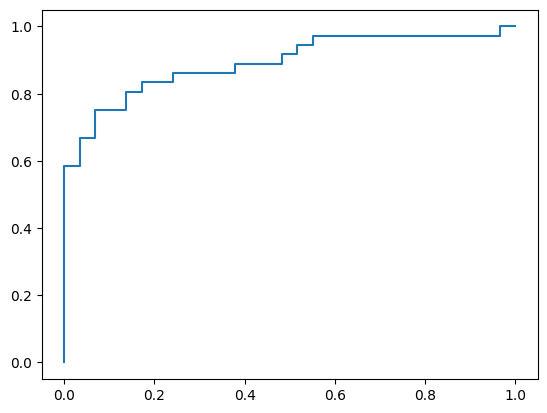

In [107]:
import matplotlib.pyplot as plt

plt.plot(rs.reporter.fpr, rs.reporter.tpr)